In [1]:
# Imports and set up

# Import NumPy for the math and Matplotlib for the charts.

import numpy as np
import matplotlib.pyplot as plt
# Barrier options are path dependent. That means the value of the option is dependent on the price path of the underlying. To create the price path, we need to simulate stock prices. In a previous notebook, we saw how to simulate stock prices with geometric Brownian motion. We’ll use a simplified version here.

def simulate_gbm(s_0, mu, sigma, T, N, n_sims=10**3, random_seed=1):
    """Simulate stock returns using Geometric Brownian Motion."""

    np.random.seed(random_seed)

    dt = T / N

    dW = np.random.normal(scale=np.sqrt(dt), size=(n_sims, N + 1))

    # simulate the evolution of the process
    S_t = s_0 * np.exp(np.cumsum((mu - 0.5 * sigma**2) * dt + sigma * dW, axis=1))
    S_t[:, 0] = s_0

    return S_t
# This function returns 1,000 simulated price paths.

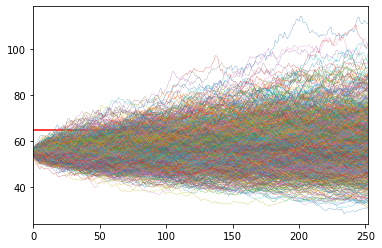

In [2]:
# Build the simulation

# Start with setting everything up.

S_0 = 55
r = 0.06
sigma = 0.2
T = 1
N = 252

BARRIER = 65
K = 60
# The simulation starts with a stock price of $55 (S_0), a return of 6% (r), and volatility of 20% (sigma). T is the time frame of the simulation (in this case one year) and N is the time step (in this case 252 trading days). Setting T and N this way simulates one price per day for a year. The barrier is set to $65 and the strike price is $60.

# Run the simulation and plot the price paths and barrier.

gbm_sims = simulate_gbm(s_0=S_0, mu=r, sigma=sigma, T=T, N=N)

plt.axhline(y=BARRIER, color='r', linestyle='-')
plt.xlim(0, N)
plt.plot(gbm_sims.T, linewidth=0.25);

In [4]:
# Value the barrier option

# First, find the maximum simulated price for each price path. Since this is an Up-and-In option, you just need to know if the maximum price reached the barrier level at any time.

max_value_per_path = np.max(gbm_sims, axis=1)
# If the option reaches the barrier, the payoff is the same as a plain vanilla European call option.

payoff = np.where(
    max_value_per_path > BARRIER,
    np.maximum(0, gbm_sims[:, -1] - K),
    0
)

In [5]:
# You can use NumPy’s where method to find the payoffs. The first argument is an array of true or false depending on whether the maximum value of a price path exceeds the barrier. Where it’s true, you get the maximum value of the last stock price in the simulation minus the strike price, or zero. That’s the same payoff as a plain vanilla European call option.

# To value the option, discount the average of the payoffs back to today.

discount_factor = np.exp(-r * T)
premium = discount_factor * np.mean(payoff)
premium


4.019441670553388